In [1]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# magic
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# hacks
import os
import sys
nb_dir = os.path.split(os.path.abspath(os.getcwd()))[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

### Test Files:

In [14]:
import Bfield

### Regeneration:

In [5]:
### uncomment to force regeneration (takes about 5 hours):
#Bdict = Bfield.precompute(autoload=False)

  progress: 99.9%   elapsed: 17161.53 [sec]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [6]:
Bdict.keys()

['y', 'x', 'z', 'BX', 'BY', 'BZ']

In [7]:
Bdict['x'].shape

(120L,)

In [8]:
Bdict['BX'].shape

(120L, 120L, 120L)

# Sun Plots

z = 0.1 [AU]
B_rho (-),  B_theta (+),  B_z (+)


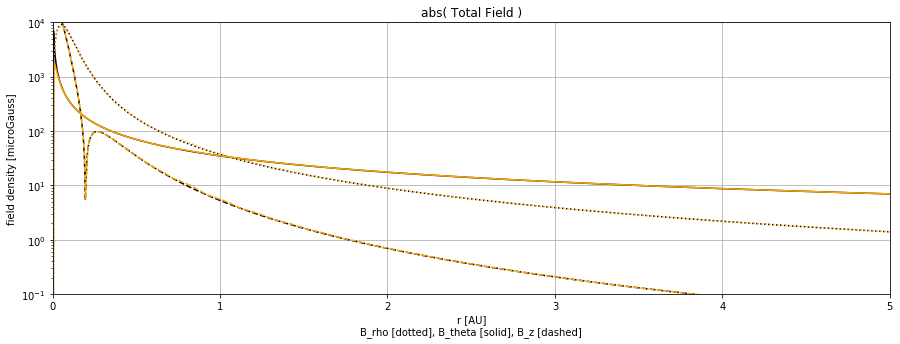

In [26]:
import Transform
import SolarMagneticModel

def plotPolar(z=.1):
    """Plot total solar magnetic field model by polar coordinates.
    Uses EMR approximation for the ring component.
    """
    print 'z = {} [AU]'.format(z)
    r_list = np.linspace(0, 5, 1000) # [AU]
    # q for quick (Bfield), s for slow (SolarMagneticModel)
    qB_rho   = []
    qB_theta = []
    qB_z     = []
    sB_rho   = []
    sB_theta = []
    sB_z     = []    
    for r in r_list:
        cartesian_pos = np.array([ r, 0, z ] ) # [AU]
        Gauss2Tesla = 1e4 # [Gauss / Tesla]
        cartesian_qB = Bfield.cartesianTesla(cartesian_pos) * Gauss2Tesla # [Gauss]
        cartesian_sB = SolarMagneticModel.sumBfieldGauss(cartesian_pos) # [Gauss]        
        polar_qB = Transform.cartesian2polar( cartesian_pos, cartesian_qB )['vec']
        polar_sB = Transform.cartesian2polar( cartesian_pos, cartesian_sB )['vec']        
        qB_rho.append(  polar_qB[0])
        qB_theta.append(polar_qB[1])
        qB_z.append(    polar_qB[2])
        sB_rho.append(  polar_sB[0])
        sB_theta.append(polar_sB[1])
        sB_z.append(    polar_sB[2])
    
    if qB_rho[-1] >= 0:
        print 'B_rho (+), ',
    else:
        print 'B_rho (-), ',

    if qB_theta[-1] >= 0:
        print 'B_theta (+), ',
    else:
        print 'B_theta (-), ',

    if qB_z[-1] >= 0:
        print 'B_z (+)'
    else:
        print 'B_z (-)'
    
    qB_rho   = np.abs( qB_rho   ) * 1e6 # [microGauss]
    qB_theta = np.abs( qB_theta ) * 1e6 # [microGauss]
    qB_z     = np.abs( qB_z     ) * 1e6 # [microGauss]
    sB_rho   = np.abs( sB_rho   ) * 1e6 # [microGauss]
    sB_theta = np.abs( sB_theta ) * 1e6 # [microGauss]
    sB_z     = np.abs( sB_z     ) * 1e6 # [microGauss]
    
    plt.figure(figsize=(15,5))
    plt.yscale('log')
    plt.xlim(0,5)
    plt.ylim(.1,1e4)
    plt.grid(True)
    plt.xlabel('r [AU]\n' + 'B_rho [dotted], B_theta [solid], B_z [dashed]')
    plt.ylabel('field density [microGauss]')
    plt.title('abs( Total Field )')
    
    plt.plot( r_list, sB_rho, color='black', linestyle='dotted' )
    plt.plot( r_list, sB_theta, color='black', linestyle='solid' )
    plt.plot( r_list, sB_z, color='black', linestyle='dashed' )

    plt.plot( r_list, qB_rho, color='orange', linestyle='dotted' )
    plt.plot( r_list, qB_theta, color='orange', linestyle='solid' )
    plt.plot( r_list, qB_z, color='orange', linestyle='dashed' )

plotPolar()